In [7]:
import pandas
import configparser
import psycopg2

In [8]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [9]:
conn = psycopg2.connect(host=host,
                       user=user,
                       password=pwd,
                       dbname=db)

In [11]:
sql = "select * from student"

In [12]:
df = pandas.read_sql_query(sql,conn)
df[:]

,s_email,s_name,major
0,s4@jmu.edu,s4,ISAT
1,s3@jmu.edu,s3,ISAT
2,s2@jmu.edu,s2,IA
3,s1@jmu.edu,s1,IA


In [13]:
sql = """
    select professor.p_name,course.c_name
    from professor
    inner join course
    on professor.p_email= course.p_email
"""

In [14]:
df = pandas.read_sql_query(sql,conn)
df[:]

,p_name,c_name
0,p1,postgresql
1,p2,mongodb
2,p1,twitter


In [24]:
sql= """
    select professor.p_name,count(*) as num_course
    from professor
    inner join course
    on professor.p_email=course.p_email
    group by professor.p_name

"""

<AxesSubplot:xlabel='p_name'>

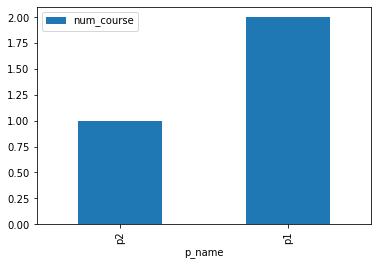

In [26]:
df = pandas.read_sql_query(sql,conn)
df.plot.bar(x='p_name', y= 'num_course')

In [27]:
sql = """
    insert into student(s_email,s_name,major)
    values ('{}','{}','{}')
""".format('s5@jmu.edu','s5','GS')

print(sql)


    insert into student(s_email,s_name,major)
    values ('s5@jmu.edu','s5','GS')



In [10]:
cur=conn.cursor()

In [29]:
cur.execute(sql)

In [30]:
conn.commit()

In [31]:
df= pandas.read_sql_query('select * from student',conn)
df[:]

,s_email,s_name,major
0,s4@jmu.edu,s4,ISAT
1,s3@jmu.edu,s3,ISAT
2,s2@jmu.edu,s2,IA
3,s1@jmu.edu,s1,IA
4,s5@jmu.edu,s5,GS


In [11]:
sql = """
    insert into professor(p_email,p_name,office)
    values('{}','{}','{}')
""".format('p4@jmu.edu','p4','04')

In [12]:
cur.execute(sql)

In [13]:
conn.commit()

In [14]:
df= pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p2@jmu.edu,p2,02
1,p3@jmu.edu,p3,03
2,p1@jmu.edu,p1,01
3,p4@jmu.edu,p4,04


In [15]:
sql = """
    insert into course(p_email,c_number,c_name,room)
    values ('{}','{}','{}','{}')
""".format('p4@jmu.edu','c5','linkedin','r2')

In [16]:
cur.execute(sql)

In [17]:
conn.commit()

In [18]:
df= pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c2,mongodb,r2,p2@jmu.edu
2,c3,twitter,r1,p1@jmu.edu
3,c5,linkedin,r2,p4@jmu.edu


In [19]:
sql = """
    update course
    set p_email= '{}'
    where p_email ='{}'

""".format('p4@jmu.edu','p2@jmu.edu')

In [20]:
cur.execute(sql)

In [21]:
conn.commit()

In [22]:
df=pandas.read_sql_query('select * from course',conn)
df[:]

,c_number,c_name,room,p_email
0,c1,postgresql,r1,p1@jmu.edu
1,c3,twitter,r1,p1@jmu.edu
2,c5,linkedin,r2,p4@jmu.edu
3,c2,mongodb,r2,p4@jmu.edu


In [23]:
sql = """
    delete from professor
    where p_email = '{}'
""".format('p2@jmu.edu')

In [24]:
cur.execute(sql)

In [25]:
conn.commit()

In [26]:
df= pandas.read_sql_query('select * from professor',conn)
df[:]

,p_email,p_name,office
0,p3@jmu.edu,p3,03
1,p1@jmu.edu,p1,01
2,p4@jmu.edu,p4,04


In [27]:
cur.close()
conn.close()